<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Weeek07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Nasyawa Ramadhia Kirana // 2141720011 // 22

# **PRAKTIKUM FILTER**

Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

In [2]:
#Akses file yang terdapat pada drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

- Buatlah fungsi konvolusi.
Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding

**Konvolusi tanpa Library**
 Membuat fungsi konvulasi
 Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambakan pada citra

In [4]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # konvolusi
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_resize = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

**FUNGSI KONVOLUSI**

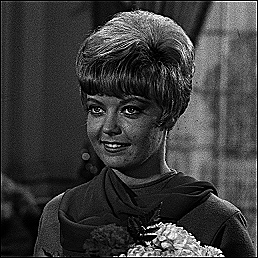

In [6]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))

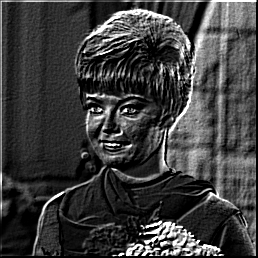

In [7]:
# Embos
embos = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, embos, 1, 2))


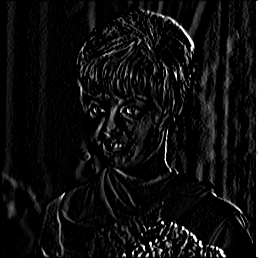

In [8]:
sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, sobel, 1, 2))


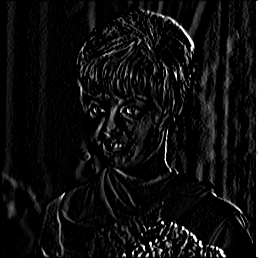

In [9]:
#Left sobel detection
sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, sobel, 1, 2))



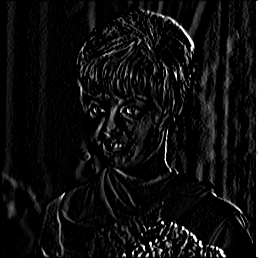

In [10]:
#Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

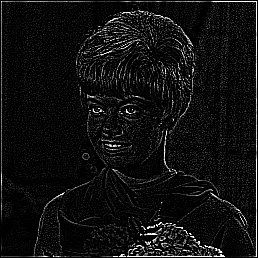

In [11]:
#Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny,1,2))

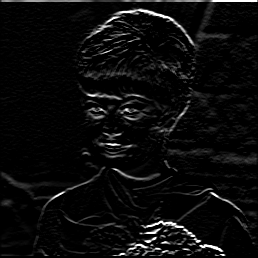

In [12]:
#Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt,1,2))

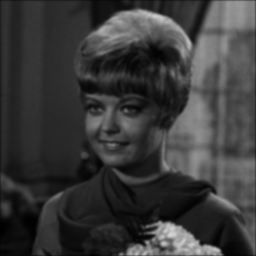

In [13]:
#5x5 Gaussian Blur
kernel_blur5 = np.array([[1,4,6,4,1],
                         [4,16,24,16,4],
                         [6,24,36,24,6],
                         [4,16,24,16,4],
                         [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, kernel_blur5,1,2))

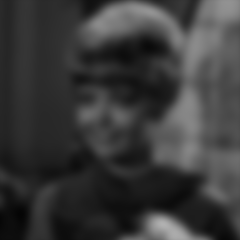

In [14]:
#21x21 Gaussian Blur
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel,1,2))

# **TUGAS**

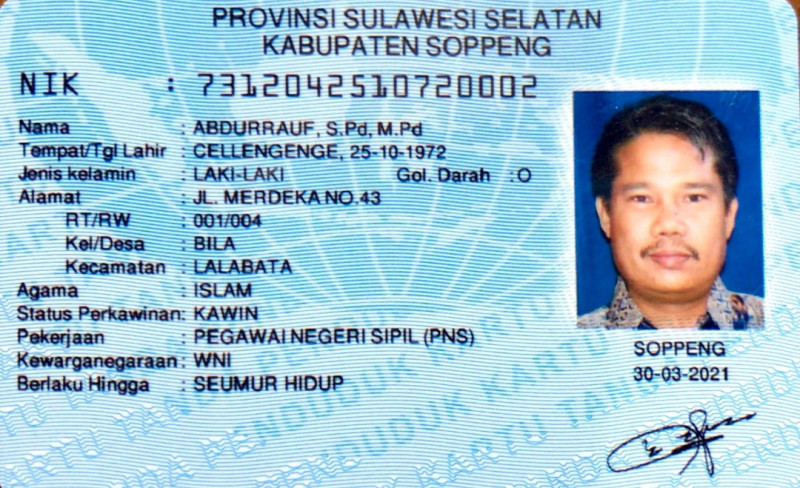

In [15]:
#loadd data
import cv2
import numpy as np

ktp_ori = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg', cv2.IMREAD_COLOR)
cv2_imshow(ktp_ori)


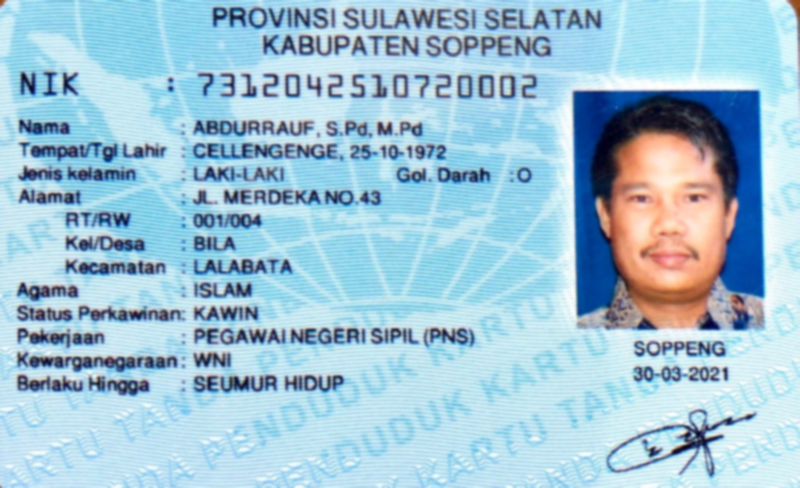

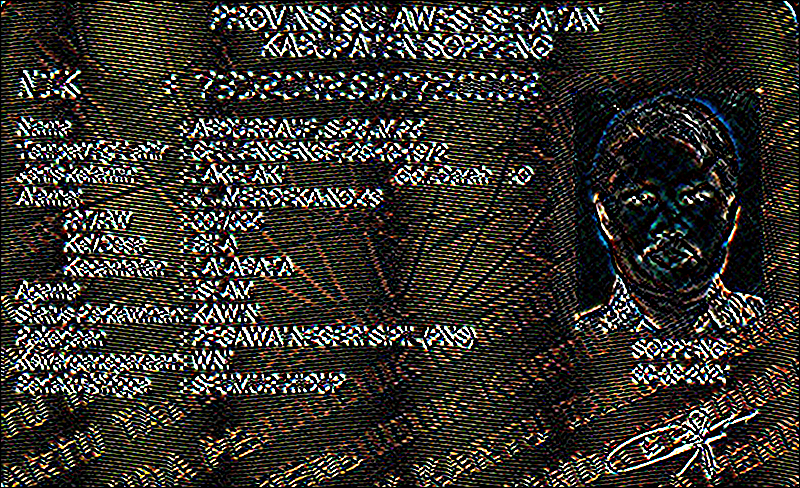

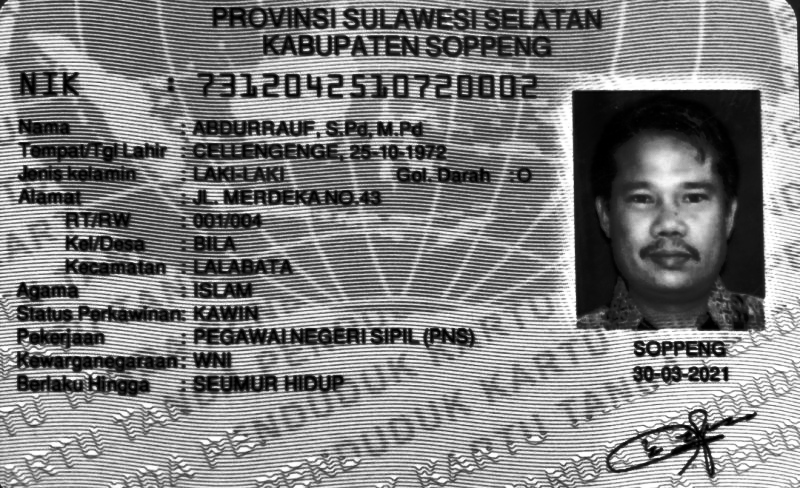

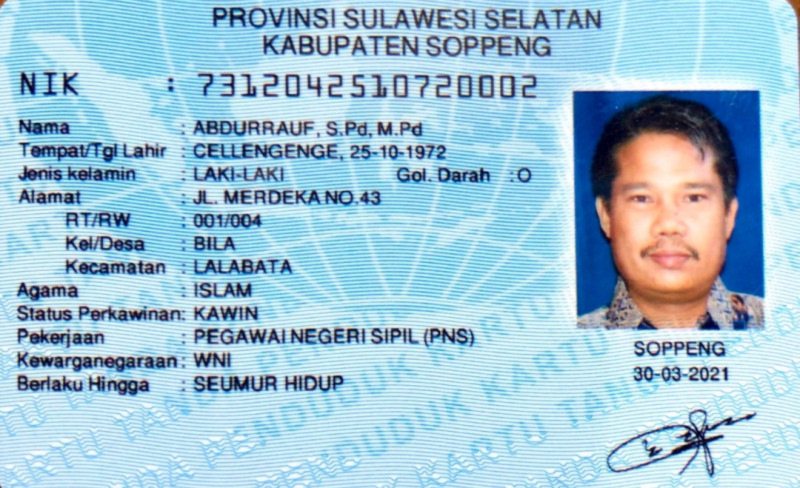

In [18]:
#
filter_img = cv2.GaussianBlur(ktp_ori, (5, 5), 0)
edges = cv2.Sobel(ktp_ori, cv2.CV_64F, 1, 1, ksize=5)
gray_img = cv2.cvtColor(ktp_ori, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

mix_img = cv2.addWeighted(ktp_ori, 0.7, filter_img, 0.3, 0)

cv2_imshow(filter_img)
cv2_imshow(edges)
cv2_imshow(equalized_img)
cv2_imshow(mix_img)